

# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#recommendations">Recommendations</a></li>
</ul>

<h3> Introduction

This is a dataset consisting of collection of several movies over some few years. This dataset is gotten from Kaggle website, it contains information about 10,000 movies originally collected from The Movie Database (TMDb), and will be used to analyze some pending questions as follows:

1. What kinds of properties are associated with movies that have high revenues.
2. Which movies yielded higher revenue?
3. Is there a correlation between popularity, runtime and revenue?
4. Does high popularity yield high revenue?

<h3> Data Wrangling

Here, I will be assessing and building intuition on the dataset, check for cleanliness, drop any column that will not be relevant for the analysis.

In [1]:
#import all necessary modules,
#load the movie dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# Load the data and print out some few lines. Perform operations to inspect data types 
# and look for instances of missing or possibly errant data.

df_movies= pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Assessing the dataset to get more insights on the data structure and features

In [7]:
# the dimension of our dataset
df_movies.shape

(10866, 21)

In [12]:
# column and row attributes
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10732 non-null float64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
budget_adj        10732 non-null float64
revenue_adj       10732 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1006.1+ KB


In [9]:
# number of unique values
df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [12]:
# check for duplicates
df_movies.duplicated().sum()

1

In [10]:
df_movies.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning


from the insights just made, I learnt that the dataset comprises of 10866 rows and 21 columns. Some columns have missing rows, and we found one duplicated value.

- I will also be dropping some columns not necessary for my analysis based on my research questions. They are: 
  id, imbd_id, homepage, tagline, overview, release_date, budget, revenue, keywords, production_companies.
- budget_adj and revenue_adj will be used for analysis instead of budget and revenue because the formal represent the constant dollar value for all the years

- All empty rows will be dropped

In [3]:
# drop irrelevant columns

df_movies.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'release_date', 'budget', 'revenue','keywords', 'production_companies'] , axis = 1, inplace = True )

In [4]:
df_movies.head()

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#drop null rows

df_movies.dropna(axis = 0, inplace = True)

In [7]:
#fill null or zero values at the budget_adj and revenue_adj columns with their respective mean value
budg_mean = df_movies.budget_adj.mean()
rev_mean = df_movies.revenue_adj.mean()

In [8]:
df_movies.budget_adj.replace(to_replace = 0, value = rev_mean, inplace = True)
df_movies.revenue_adj.replace(to_replace = 0, value = rev_mean, inplace = True)

In [98]:
df_movies.shape

(10732, 11)

In [19]:
df_movies.nunique()

popularity        10684
original_title    10439
cast              10665
director           5018
runtime             243
genres             2022
vote_count         1289
vote_average         70
release_year         56
budget_adj         2603
revenue_adj        4835
dtype: int64

<a id='eda'></a>
# Exploratory Data Analysis

In this section, I am going to use visualization to answer the research questions introduced above.


But before then, I would like to see a visualization of columns in the dataset; mostly columns like revenue_adj, popularity, runtime etc. Therefore, I would be plotting a histogram of the columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfcded2be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcfcdcb16d8>]], dtype=object)

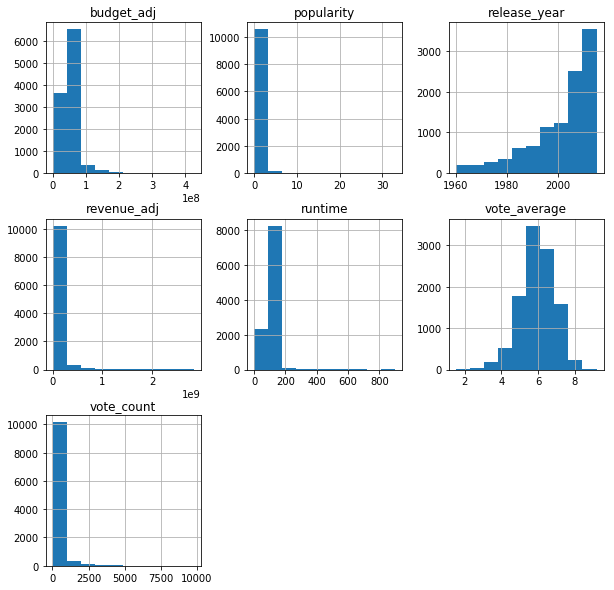

In [10]:
df_movies.hist(figsize=(10,10))

###### The histogram charts above shows the distribution of all the numerical columns in the dataset. Nearly all the columns are heavily skewed to the right apart from columns such as release_year and vote_average, which are skewed to the left. This skewness is important in areas of predicting analyses. Skewing to the right could imply that such columns could have extremely high value but can never be a negative or zero value. 
###### Using the revenue_adj for instance, a movie could yield extremely huge amount of revenue but can never incure a zero or negative revenue.

### Research Question 1:  (What kinds of properties are associated with movies that have high revenues)

divide the dataset into two groups of high and low revenue. Then analyze the properties associated with both groups, then compare the high group to the low group.

In [19]:
#divide the data set into low and high revenue group using the median function
rev_mean2 = df_movies['revenue_adj'].mean()
low_rev = df_movies.query('revenue_adj < {}'.format(rev_mean2))
high_rev = df_movies.query('revenue_adj > {}'.format(rev_mean2))

#### PROPERTIES OF LOW REVENUE MOVIES

In [11]:
low_rev.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8.982000e+03,8.982000e+03
mean,0.437673,100.124248,84.206635,5.887130,2001.635605,4.002089e+07,4.250552e+07
std,0.450407,30.849916,183.510695,0.946061,12.844372,2.102801e+07,1.891121e+07
min,0.000188,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.188215,90.000000,15.000000,5.300000,1995.000000,2.103337e+07,3.733098e+07
50%,0.326901,97.000000,29.000000,5.900000,2006.000000,5.200147e+07,5.200147e+07
75%,0.542806,108.000000,75.000000,6.500000,2012.000000,5.200147e+07,5.200147e+07
max,11.422751,900.000000,5754.000000,9.200000,2015.000000,4.250000e+08,8.051459e+07


A bar chart to show the mean properties of movies with low revenue

#### PROPERTIES OF HIGH REVENUE MOVIES

In [10]:
high_rev.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,442.000000,442.000000,4.420000e+02,4.420000e+02,442.000000,442.000000,442.000000,442.000000,4.420000e+02,4.420000e+02
mean,43313.049774,3.104557,9.660790e+07,4.168340e+08,118.533937,1952.097285,6.552489,2005.269231,1.028262e+08,4.797286e+08
std,64241.465948,3.050931,6.482236e+07,3.095553e+08,21.763103,1600.907548,0.717425,10.347583,6.088377e+07,3.647308e+08
min,11.000000,0.044675,0.000000e+00,3.597600e+07,80.000000,13.000000,4.700000,1962.000000,1.577503e+04,1.663543e+08
25%,948.500000,1.516647,4.262500e+07,2.116776e+08,102.000000,732.250000,6.000000,2003.000000,5.613662e+07,2.309120e+08
50%,11494.500000,2.343497,8.500000e+07,3.159038e+08,117.000000,1503.000000,6.500000,2009.000000,9.214876e+07,3.555363e+08
75%,57653.000000,3.681085,1.500000e+08,5.326791e+08,130.000000,2820.500000,7.100000,2012.000000,1.490176e+08,6.069247e+08
max,294254.000000,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


### Research Question 2 ( Which movie yielded highest revenue?)

Using the high revenue group dataset, query the movie title with a max revenue

In [20]:
# I already have my high revenue group dataset - high_rev
rev_max = high_rev.revenue_adj.max()
high_rev.query('revenue_adj == {}'.format(rev_max))

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2.408869e+08,2.827124e+09


To show the chart plot for this question, I will select the top 10 movies from the high revenue group dataset, Then, I will plot a bar chart of the original_title column against the revenue_adj. This will visually present this top 10 highest revenue movies and the amount of their individual revenue values. 
The movie with having the highest revenue value is the one that yielded the highest revenue.

Text(0.5,1,'Bar Chart Showing top 10 movies and their generated revenue')

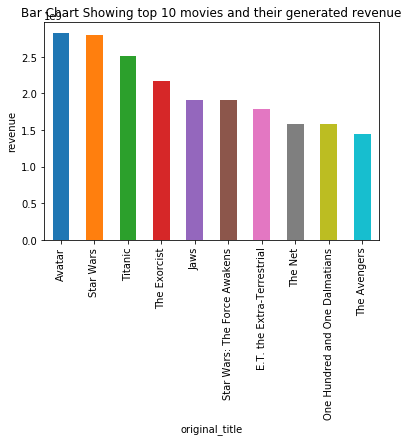

In [21]:
top_10 = high_rev.nlargest(10, columns = 'revenue_adj')
top_10[['original_title', 'revenue_adj']].plot(x = 'original_title', y = 'revenue_adj', kind = 'bar',  legend = False)
plt.ylabel('revenue')
plt.title("Bar Chart Showing top 10 movies and their generated revenue")

##### The chart above shows that the movie with original title as Avatar, has the highest revenue of about 2.827124e+09 in value compared to Star Wars, Titanic, The Exorcist which are second and third respectively in terms of highest revenues.

###  Research Question 3 ( Is there a correlation between popularity, runtime and revenue?)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fcfcdc577f0>,
 Text(0.5,1,'Plot showing the relationship between popularity and revenue_adj'))

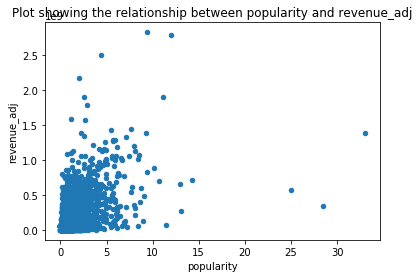

In [22]:
def scatter_plot(x, y):
    return df_movies.plot.scatter(x, y),  plt.title("Plot showing the relationship between {} and {}".format(x, y))
    
scatter_plot('popularity', 'revenue_adj')

#####  In the plot above, there is a movement of the points from left to right in an upward direction, hence, the relationship between popularity and revenue is a positive correlation.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fcfcccd4cc0>,
 Text(0.5,1,'Plot showing the relationship between runtime and revenue_adj'))

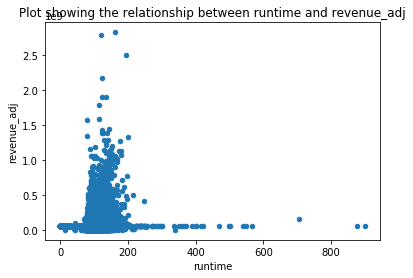

In [23]:
scatter_plot('runtime', 'revenue_adj')

##### The graph above does not indicate any corresponding movement between the two variables. Most of the points seems to be concentrated on one level. In this case, there is no correlation between the runtime and revenue.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fcfccc13320>,
 Text(0.5,1,'Plot showing the relationship between runtime and popularity'))

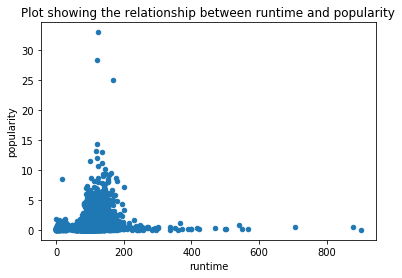

In [24]:
scatter_plot('runtime',  'popularity')


###### In the graph above, the plots are more concentrated on a particular level with no significant movement. There is no correlation for the variables compared here; which are runtime and popularity

### Research Question 4 (Does high popularity yield high revenue?)

I will do this comparism using a scatter plot of the high popularity group or high revenue group. Using the high popularity group, I will plot a scatter plot. from the plot, I can deduce if the result answers the question.

Here, high_pop = dataset for high popularity

Text(0.5,1,'Plot showing the relationship between Popularity and Revenue')

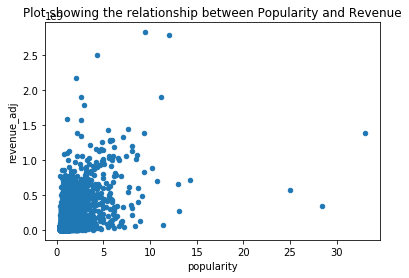

In [25]:
pop_median = df_movies.popularity.median()
high_pop = df_movies.query('popularity > {}'.format(pop_median))

high_pop.plot.scatter(x = 'popularity', y = 'revenue_adj')
plt.title("Plot showing the relationship between Popularity and Revenue")


##### The scatter plot shows a positive correlation between the popularity of movies and the revenue generated.

Text(0,0.5,'revenue')

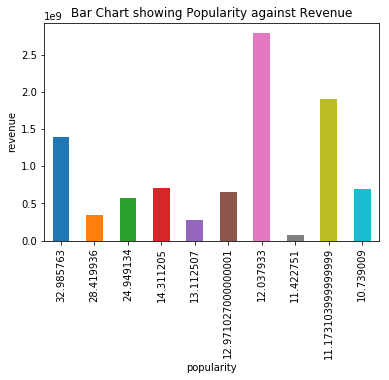

In [26]:
top_10_pop = df_movies.nlargest(10, columns = 'popularity')
top_10_pop
top_10_pop[['popularity', 'revenue_adj']].plot(kind = 'bar', x = 'popularity', y = 'revenue_adj', legend = False)
plt.title("Bar Chart showing Popularity against Revenue")
plt.ylabel('revenue')

##### Though the scatter plot showed a positive correlation, but that is not sufficient enough to say that increase in popularity would lead to a corresponding increase in the revenue. As seen from the bar chart, some movies yielded higher revenue than other movies with much higher popularity. 

## Conclusions

### Research Question 1: What kinds of properties are associated with movies that have high revenues?
Movies with high revenue, tends to also have high value of mean for popularity, runtime, vote_counts, vote_average and budget_adj. It is safe to say that, the increase in the budget and other factors such as the popularity, runtime, vote counts, would resulting to increase in the revenue for a movie.

### Research Question 2: ( Which movie yielded highest revenue?)
From the analysis, The movie with original_title as Avatar yielded the highest revenue of value = 2.827124e+09.

### Research Question 3: ( Is there a correlation between popularity, runtime and revenue?)
From the scatter plot,
- there is a positive correlation between popularity and revenue. 
- No correlation exists for runtime and revenue.
- Also no correlation exists for runtime and popularity.

### Research Question 4: (Does high popularity yield high revenue?)
 Since there is a positive correlation between popularity and revenue, it is safe to say that popularity of a movie also contributes to high revenue, with other factors.

## Limitations
I wanted to add few research questions in addition to the above questions, questions such as:
- The production_company with the highest revenue yield.
- Also to test for a correlation to determine if a particular production company results to high revenue returns.
I could not carry on with this because most of the rows for the production_company are null. Dropping this column would result to dropping of large amount of data samples.

## Recommendations
- An update to the dataset that correctly updates the missing production_company columns.
- A seperate analysis focusing only on the correlation of production_company and revenue. This way, dropping of all NA rows can be comfortably done.

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0